# Analyzing STAC Metadata

This notebook gives you a few examples how you can use tools like `pandas` to make analyses on the queried metadata.

In [1]:
try:
    import pandas as pd
except ImportError:
    %pip install pandas
    import pandas as pd

try:
    import geopandas 
except ImportError:
    %pip install geopandas
    import geopandas 

try:
    import matplotlib.pyplot as plt
except ImportError:
    %pip install matplotlib
    import matplotlib.pyplot as plt

from pystac_client import Client
import requests


In [2]:
eodc_catalog = Client.open(
    "https://stac.eodc.eu/api/v1",
)

## Load the data

First we load the data, we want to analyze. This is described in the [Data Discorvery Notebook](https://github.com/eodcgmbh/eodc-examples/blob/main/demos/python-stac_DataDiscovery.ipynb).

In [3]:
time_range = "2023-05-01/2024-05-01"

# Bounding box of Austria
bbox_aut = [9.25, 46.31, 17.46, 49.18]

In [4]:
search = eodc_catalog.search(
    collections=["SENTINEL2_L1C"],
    bbox = bbox_aut,
    datetime=time_range
)

items = search.item_collection()

## Rolling average of the cloud-cover of Sentinel-2 over Austria over time

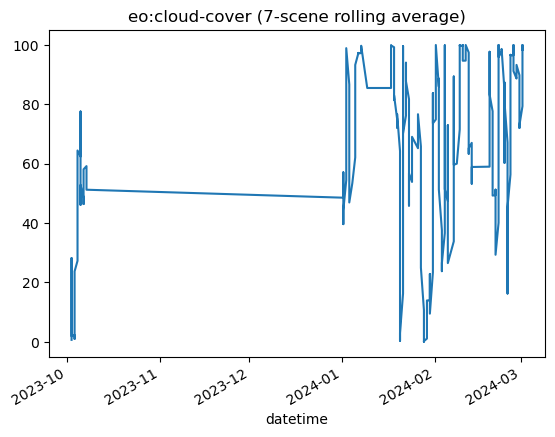

In [5]:
df = geopandas.GeoDataFrame.from_features(items.to_dict())
df["datetime"] = pd.to_datetime(df["datetime"])

ts = df.set_index("datetime").sort_index()["eo:cloud_cover"].rolling(7).mean()
ts.plot(title="eo:cloud-cover (7-scene rolling average)");

## Visualize Sentinel-2 L1C data over Europe

Bounding box of the EU and a smaller time period, to reduce the amount of items

In [6]:
bbox_eu = [-63.151187329826996,
 -21.349632697207902,
 55.834818182891276,
 70.09213659004354]

time_range_eu = "2024-03-01/2024-04-01"


In [7]:
search_eu = eodc_catalog.search(
    collections=["SENTINEL2_L1C"],
    bbox = bbox_eu,
    datetime=time_range_eu
)

print("We found ", search_eu.matched(), " items, that match our filter criteria.")

We found  2485  items, that match our filter criteria.


In [8]:
items_eu = search_eu.item_collection()
df = geopandas.GeoDataFrame.from_features(items_eu.to_dict())

We create a map with all found items over Europe

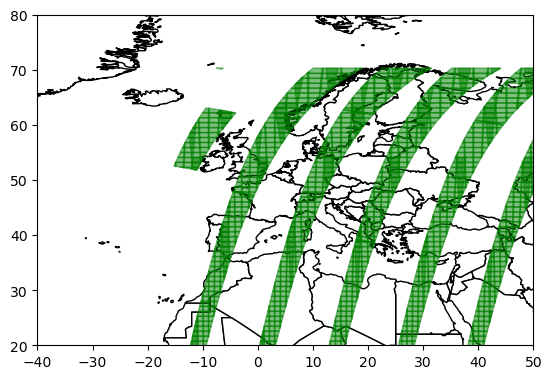

In [9]:
world = geopandas.read_file("./data/world-administrative-boundaries/world-administrative-boundaries.shp")
ax = world.plot(color='white', edgecolor='black')
df.plot(ax=ax, edgecolor='green', facecolor="green", alpha=0.5, linewidth=1)
ax.set_xlim([-40,50])
ax.set_ylim([20,80])
plt.show()